Load Dataset & Preprocessing Data

In [1]:
import pandas as pd

In [3]:
#pada kolom gender 1 untuk mempresentasikan male / laki-laki, sedangkan 0 untul mempresentasikan sebagai female / perempuan

dataset = pd.read_csv("gender_classification_v7.csv", nrows = 500)
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
495,1,11.7,6.2,1,1,1,0,Male
496,1,12.0,5.3,0,1,0,0,Female
497,1,14.3,6.8,1,1,1,1,Male
498,1,13.7,5.8,1,1,1,1,Male


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  500 non-null    int64  
 1   forehead_width_cm          500 non-null    float64
 2   forehead_height_cm         500 non-null    float64
 3   nose_wide                  500 non-null    int64  
 4   nose_long                  500 non-null    int64  
 5   lips_thin                  500 non-null    int64  
 6   distance_nose_to_lip_long  500 non-null    int64  
 7   gender                     500 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 31.4+ KB


Menghitung total nilai dari masing - masing label / output

In [5]:
dataset['gender'].value_counts()

gender
Male      256
Female    244
Name: count, dtype: int64

In [6]:
dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.84800,13.198600,5.972000,0.494000,0.504000,0.540000,0.534000
std,0.35938,1.123933,0.534141,0.500465,0.500485,0.498897,0.499342
min,0.00000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,13.100000,6.000000,0.000000,1.000000,1.000000,1.000000
75%,1.00000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.00000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Split Dependent (Label/Outcome) & Independent (Atribut) Variable

In [7]:
x = dataset.iloc[:, [0,1,2,3,4,5,6]].values
y = dataset.iloc[:, 7].values

In [8]:
print(x)

[[ 1.  11.8  6.1 ...  0.   1.   1. ]
 [ 0.  14.   5.4 ...  0.   1.   0. ]
 [ 0.  11.8  6.3 ...  1.   1.   1. ]
 ...
 [ 1.  14.3  6.8 ...  1.   1.   1. ]
 [ 1.  13.7  5.8 ...  1.   1.   1. ]
 [ 1.  11.5  5.1 ...  1.   0.   0. ]]


Split Train Data & Test Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
x_train

array([[ 1. , 15.3,  6.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 13.8,  6.1, ...,  0. ,  1. ,  1. ],
       [ 1. , 15.1,  6. , ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 14.3,  6.1, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.7,  5.3, ...,  1. ,  1. ,  0. ],
       [ 1. , 13.1,  6.1, ...,  0. ,  1. ,  1. ]])

Feature Scalling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
print(x_train)

[[ 0.41595736  1.87465971  1.38550123 ...  1.02020406  0.94643256
   0.96076892]
 [ 0.41595736  0.53959048  0.24045889 ... -0.98019606  0.94643256
   0.96076892]
 [ 0.41595736  1.69665048  0.0496185  ...  1.02020406  0.94643256
   0.96076892]
 ...
 [ 0.41595736  0.98461356  0.24045889 ... -0.98019606 -1.05659932
  -1.040833  ]
 [ 0.41595736  0.45058586 -1.28626423 ...  1.02020406  0.94643256
  -1.040833  ]
 [ 0.41595736 -0.08344183  0.24045889 ... -0.98019606  0.94643256
   0.96076892]]


In [12]:
print(x_test)

[[ 0.41595736 -0.79547875 -0.71374306  1.         -0.98019606 -1.05659932
  -1.040833  ]
 [ 0.41595736  0.62859509  0.81298006 -1.         -0.98019606 -1.05659932
  -1.040833  ]
 [-2.40409256  0.0945674   1.00382045 -1.         -0.98019606  0.94643256
   0.96076892]
 [ 0.41595736  0.62859509  0.24045889 -1.         -0.98019606  0.94643256
  -1.040833  ]
 [ 0.41595736  1.51864125 -0.90458345 -1.          1.02020406  0.94643256
   0.96076892]
 [-2.40409256 -0.61746952 -1.47710462  1.          1.02020406  0.94643256
   0.96076892]
 [ 0.41595736  0.27257663  0.24045889  1.          1.02020406  0.94643256
   0.96076892]
 [ 0.41595736 -0.79547875  0.81298006 -1.          1.02020406  0.94643256
   0.96076892]
 [ 0.41595736 -0.61746952  0.24045889 -1.          1.02020406  0.94643256
   0.96076892]
 [-2.40409256 -0.61746952  1.57634162  1.          1.02020406 -1.05659932
   0.96076892]
 [-2.40409256  1.42963663  0.81298006  1.          1.02020406  0.94643256
   0.96076892]
 [ 0.41595736 -0.1724

Klasifikasi KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 16)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=16)

Cek Akurasi dan Evaluasi

In [21]:
prediction = knn.predict(x_test)
print("Jika Nilai K = {}, maka Hasil Akurasinya Adalah: {:.2f}%".format(7, knn.score(x_test, y_test)*100))

Jika Nilai K = 7, maka Hasil Akurasinya Adalah: 96.00%


              precision    recall  f1-score   support

      Female       0.93      0.93      0.93        45
        Male       0.95      0.95      0.95        55

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



<AxesSubplot: >

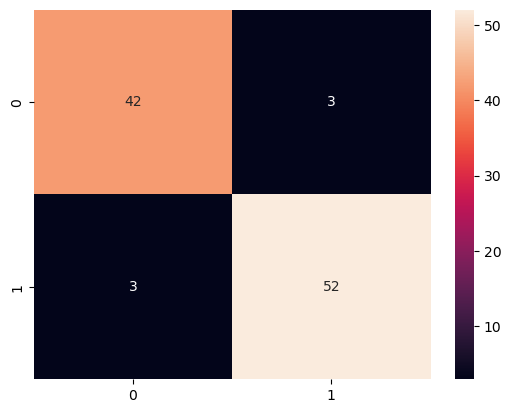

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

print(classification_report(y_test, prediction))
sb.heatmap(confusion_matrix(y_test, prediction), annot = True)

Mencari Nilai K Terbaik

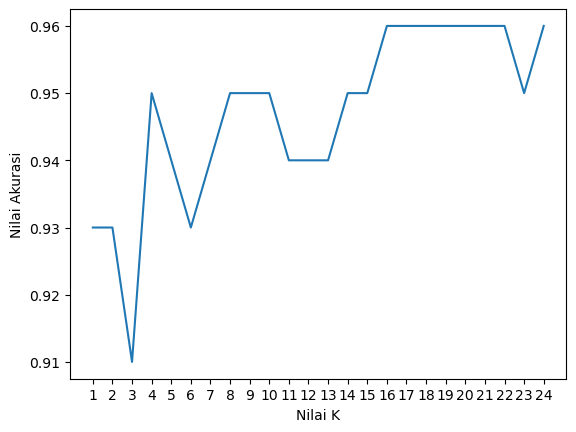

Skor Akurasi Paling Tinggi Adalah 96.00%


In [17]:
import matplotlib.pyplot as plt
import numpy as np


kTerbaik = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    kTerbaik.append(knn2.score(x_test, y_test))

plt.plot(range(1,25), kTerbaik)
plt.xticks(np.arange(1,25,1))
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

maxAccuracy = max(kTerbaik) * 100
print("Skor Akurasi Paling Tinggi Adalah {:.2f}%".format(maxAccuracy))

Visualisasi Data

/tmp/ipykernel_25472/1334206450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = "gender", data = dataset, palette = "bwr")


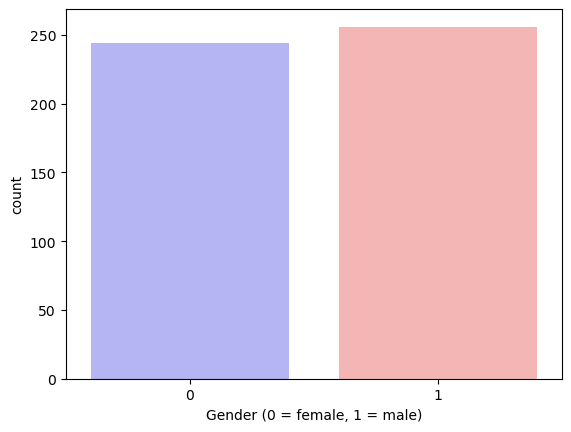

In [78]:
from matplotlib.colors import ListedColormap

sb.countplot(x = "gender", data = dataset, palette = "bwr")
plt.xlabel("Gender (0 = female, 1 = male)")
plt.show()

In [79]:
countFemale = len(dataset[dataset.gender == 0])
countMale = len(dataset[dataset.gender == 1])
print("Persentase Jenis Kelamin Pria: {:.2f}%".format((countFemale / (len(dataset.gender)) * 100)))
print("Persentase Jenis Kelamin Wanita: {:.2f}%".format((countMale / (len(dataset.gender)) * 100)))

Percentage of Gender Female: 48.80%
Percentage of Gender male: 51.20%


In [80]:
dataset.groupby("gender").mean()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
0,0.852459,12.829098,5.812295,0.106557,0.139344,0.163934,0.151639
1,0.843750,13.550781,6.124219,0.863281,0.851562,0.898438,0.898438
